#### Python image processing OpenCV (12): Roberts operator, Prewitt operator, Sobel operator and Laplacian operator edge detection technology
##### Roberts operator
###### Roberts operator, also known as Roberts operator, is one of the simplest operators, which uses local difference operators to find edges. He uses the difference between two adjacent pixels in the diagonal direction to approximate the gradient amplitude to detect edges. The effect of detecting vertical edges is better than that of oblique edges, the positioning accuracy is high, and it is sensitive to noise and cannot suppress the influence of noise. In 1963, Roberts proposed this edge-finding operator. Roberts edge operator is a 2x2 template that uses the difference between two adjacent pixels in the diagonal direction.

###### The template of Roberts operator is divided into horizontal direction and vertical direction. As shown below, it can be seen from the template that Roberts operator can better enhance the edge of the image with plus or minus 45 degrees.

###### dx = \left[ \begin{matrix} -1 & 0\\ 0 & 1 \\ \end{matrix} \right] dx=[−10​01​]
###### dy = \left[ \begin{matrix} 0 & -1\\ 1 & 0 \\ \end{matrix} \right] dy=[01​−10​]

###### The calculation formulas of Roberts operator in the horizontal and vertical directions are as follows:

###### d_x(i, j) = f(i + 1, j + 1) - f(i, j) dx​(i,j)=f(i+1,j+1)−f(i,j)

######  d_y(i, j) = f(i, j + 1) - f(i + 1, j) dy​(i,j)=f(i,j+1)−f(i+1,j)

######  The final calculation formula of Roberts operator pixel is as follows:

######  S = \sqrt{d_x(i, j)^2 + d_y(i, j)^2}

###### To realize the Roberts operator, we mainly pass the OpenCVfilter2D() This function, the main function of this function is to realize the convolution operation of the image through the convolution kernel:
###### def filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None)

In [25]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = cv.imread('panda.jpg', cv.COLOR_BGR2GRAY)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Grayscale processing image
grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

###### Then use Numpy to build a convolution kernel, and perform a convolution operation on the gray image in the x and y directions:

In [4]:
kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
kernely = np.array([[0, -1], [1, 0]], dtype=int)

x = cv.filter2D(grayImage, cv.CV_16S, kernelx)
y = cv.filter2D(grayImage, cv.CV_16S, kernely)

###### Note: After the Roberts operator is processed, the convertScaleAbs() function needs to be called to calculate the absolute value, and the image is converted to an 8-bit image for display, and then image fusion can be performed:

In [5]:
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)
Roberts = cv.addWeighted(absX, 0.5, absY, 0.5, 0)

###### Finally, the image is displayed through pyplot:

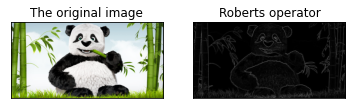

In [6]:
titles = ['The original image', 'Roberts operator']
images = [rgb_img, Roberts]

for i in range(2):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

# sobel operator

In [26]:
sobel_kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
print(sobel_kernel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [27]:
def sobel_edge_detection(img, sobel_kernel, verbose=False):

    x = cv2.filter2D(img, cv2.CV_16S, sobel_kernel)

 
    if verbose:
        plt.imshow(x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()
        
    y = cv2.filter2D(img, cv2.CV_16S, np.flip(sobel_kernel.T, axis=0))
    
    if verbose:
        plt.imshow(y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()
        
    absX = cv2.convertScaleAbs(x)
    absY = cv2.convertScaleAbs(y)
    sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
 
    if verbose:
        plt.imshow(sobel, cmap='gray')
        plt.title("Sobel")
        plt.show()

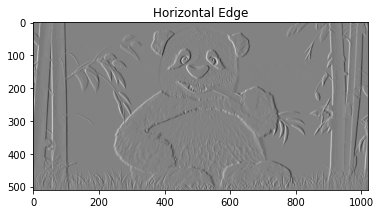

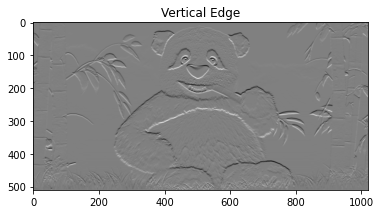

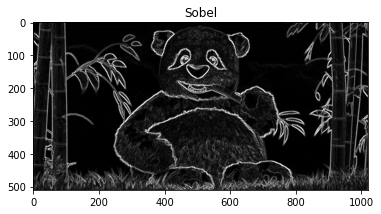

In [28]:
sobel_edge_detection(img, sobel_kernel, verbose=True)

# prewitt Operator

In [29]:
kernelx = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=int)
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=int)


x = cv2.filter2D(img, cv2.CV_16S, kernelx)
y = cv2.filter2D(img, cv2.CV_16S, kernely)

In [30]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

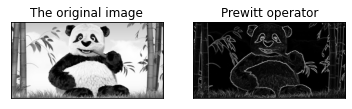

In [31]:
titles = ['The original image', 'Prewitt operator']
images = [img, Prewitt]

for i in range(2):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()